In [1]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

In [2]:
from matplotlib import pyplot as plt 

In [16]:
import numpy as np
from sklearn import preprocessing
X = np.array([[1., -1., 2.],  #创建一个原始数据：3x3
              [2., 0., 0.],
              [0., 1., -1.]])
scaler = preprocessing.StandardScaler().fit(X)
print(scaler.mean_)  # 计算每一列的均值
print(scaler.var_)  # 计算每一列的方差
newX = scaler.transform(X)  # 将特征值减去均值，除以标准差。
print(newX)

[1.         0.         0.33333333]
[0.66666667 0.66666667 1.55555556]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


In [2]:
import pandas as pd

In [3]:
sd_log = pd.read_csv('/Users/robin/GitLab/thesis/data/BPI2012/Active2012_1D_sdlog.csv')

In [4]:
sd_log

Arrival rate1D  Finish rate1D  Num of unique resource1D  \
0                43             31                        39   
1                50             29                        38   
2               107            101                        40   
3                83             85                        42   
4               126            111                        41   
..              ...            ...                       ...   
147              75             70                        38   
148              71             35                        36   
149             155            158                        43   
150             123            146                        40   
151             138            121                        41   

     Process active time1D  Service time per case1D  \
0             10199.383333              3284.688889   
1             10678.516667              3110.885034   
2             20380.683333              2671.339706   
3             18983.550000              2891.513992   
4             29753.266667              2689.066949   
..                     ...                      ...   
147           10709.666667              1237.405708   
148           11847.616667              1319.004412   
149           19917.716667              1101.123944   
150           16053.250000              1000.468116   
151           16604.150000               804.503435   

     Time in process per case1D  Waiting time in process per case1D  \
0                    242.842460                        -3041.846429   
1                    217.928912                        -2892.956122   
2                    199.810621                        -2471.529085   
3                    234.364815                        -2657.149177   
4                    252.146328                        -2436.920621   
..                          ...                                 ...   
147                  146.707763                        -1090.697945   
148                  174.229657                        -1144.774755   
149                  140.265610                         -960.858333   
150                  139.593478                         -860.874638   
151                  126.749237                         -677.754198   

     Num in process case1D  
0                     12.0  
1                     33.0  
2                     39.0  
3                     37.0  
4                     52.0  
..                     ...  
147                   56.0  
148                   92.0  
149                   89.0  
150                   66.0  
151                   83.0  

[152 rows x 8 columns]

In [43]:
x_train = sd_log['Arrival rate1D'][:-20].values
x_test = sd_log['Arrival rate1D'][-20:].values

y_train = sd_log['Finish rate1D'][:-20].values
y_test = sd_log['Finish rate1D'][-20:].values

In [41]:
x_train

array([ 43,  50, 107,  83, 126,  79,  94,  41,  67,  81,  74,  93,  76,
        77,  43,  40, 103, 106, 134,  87,  75,  55,  56,  89,  90,  70,
        97,  60,  43,  50, 104,  94, 120,  81,  85,  51,  51, 106,  99,
       107, 233, 113,  66,  57, 102, 109, 118, 223, 151,  64,  59, 112,
        99, 107,  73,  71,  52,  56,  99,  90,  92, 105,  67,  70,  54,
       115,  79,  93,  73,  50,  57,  46, 105,  88,  91,  79,  76,  39,
        25,  68,  73,  73,  68,  52,  25,  17,  36,  85, 106, 108,  72,
        27,  31, 124, 128, 121, 106,  82,  63,  65, 117,  88, 104, 112,
       101,  69,  63, 122,  88, 106,  84,  92,  57,  59, 111, 105, 105,
        83,  61,  50,  55, 102,  93,  98, 109,  84,  47,  45, 102, 109,
       108, 102])

In [36]:
linear_reg_model = linear_model.LinearRegression()
linear_reg_model.fit(x_train,y_train)

y_pred = linear_reg_model.predict(x_test)

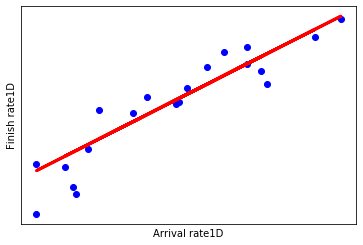

In [37]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=3)
plt.xlabel('Arrival rate1D')
plt.ylabel('Finish rate1D')
plt.xticks(())
plt.yticks(())

plt.show()

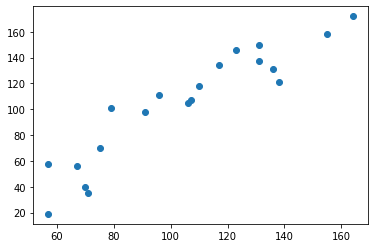

In [16]:
plt.scatter(x_test, y_test)
plt.show()

In [11]:
# define the true objective function
def objective(x, a, b):
    return a * x + b

In [12]:
from scipy.optimize import curve_fit

In [42]:
x_train

array([ 43,  50, 107,  83, 126,  79,  94,  41,  67,  81,  74,  93,  76,
        77,  43,  40, 103, 106, 134,  87,  75,  55,  56,  89,  90,  70,
        97,  60,  43,  50, 104,  94, 120,  81,  85,  51,  51, 106,  99,
       107, 233, 113,  66,  57, 102, 109, 118, 223, 151,  64,  59, 112,
        99, 107,  73,  71,  52,  56,  99,  90,  92, 105,  67,  70,  54,
       115,  79,  93,  73,  50,  57,  46, 105,  88,  91,  79,  76,  39,
        25,  68,  73,  73,  68,  52,  25,  17,  36,  85, 106, 108,  72,
        27,  31, 124, 128, 121, 106,  82,  63,  65, 117,  88, 104, 112,
       101,  69,  63, 122,  88, 106,  84,  92,  57,  59, 111, 105, 105,
        83,  61,  50,  55, 102,  93,  98, 109,  84,  47,  45, 102, 109,
       108, 102])

In [49]:
popt, _ = curve_fit(objective, x_test, y_test)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 1.24878 * x + -26.58579


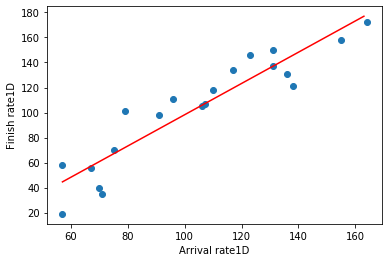

In [52]:
plt.scatter(x_test, y_test)
# define a sequence of inputs between the smallest and largest known inputs
x_line = range(min(x_test), max(x_test), 1)
# calculate the output for the range
y_line = objective(x_line, a, b)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='red')
plt.xlabel('Arrival rate1D')
plt.ylabel('Finish rate1D')
plt.show()

In [19]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

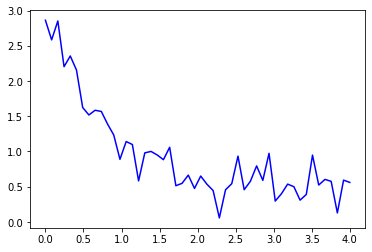

In [20]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

In [27]:
ydata

array([2.86253211, 2.58408736, 2.85238869, 2.20328028, 2.35505211,
       2.15580098, 1.62385977, 1.51773747, 1.58460558, 1.56780331,
       1.38926991, 1.23309392, 0.88831179, 1.14039132, 1.09814583,
       0.58195014, 0.97957583, 1.00016637, 0.94937867, 0.88281865,
       1.05904456, 0.51311865, 0.54700714, 0.66390699, 0.47465497,
       0.65048962, 0.53479316, 0.44458898, 0.05609672, 0.45631037,
       0.54242354, 0.93328116, 0.45668558, 0.57625432, 0.79441476,
       0.58926037, 0.97314073, 0.29536801, 0.39975342, 0.53597812,
       0.49927828, 0.30842097, 0.38933359, 0.9474868 , 0.5229339 ,
       0.60288646, 0.5756889 , 0.1270815 , 0.59254164, 0.55991963])

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


<Figure size 640x480 with 1 Axes>

In [1]:
import dcor

In [55]:
import pysd
import pandas as pd 
from matplotlib import pyplot as plt

In [56]:
df = pd.read_csv('/Users/robin/GitLab/thesis/data/BPI2012/Active2012_1D_sdlog.csv')

In [57]:
df.columns

Index(['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D',
       'Process active time1D', 'Service time per case1D',
       'Time in process per case1D', 'Waiting time in process per case1D',
       'Num in process case1D'],
      dtype='object')

In [58]:
data = df[['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D',
       'Process active time1D', 'Service time per case1D',
       'Time in process per case1D',
       'Num in process case1D']]

In [59]:
data

Arrival rate1D  Finish rate1D  Num of unique resource1D  \
0                43             31                        39   
1                50             29                        38   
2               107            101                        40   
3                83             85                        42   
4               126            111                        41   
..              ...            ...                       ...   
147              75             70                        38   
148              71             35                        36   
149             155            158                        43   
150             123            146                        40   
151             138            121                        41   

     Process active time1D  Service time per case1D  \
0             10199.383333              3284.688889   
1             10678.516667              3110.885034   
2             20380.683333              2671.339706   
3             18983.550000              2891.513992   
4             29753.266667              2689.066949   
..                     ...                      ...   
147           10709.666667              1237.405708   
148           11847.616667              1319.004412   
149           19917.716667              1101.123944   
150           16053.250000              1000.468116   
151           16604.150000               804.503435   

     Time in process per case1D  Num in process case1D  
0                    242.842460                   12.0  
1                    217.928912                   33.0  
2                    199.810621                   39.0  
3                    234.364815                   37.0  
4                    252.146328                   52.0  
..                          ...                    ...  
147                  146.707763                   56.0  
148                  174.229657                   92.0  
149                  140.265610                   89.0  
150                  139.593478                   66.0  
151                  126.749237                   83.0  

[152 rows x 7 columns]

In [61]:
variables = list(data.columns)
print(variables)

['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D', 'Process active time1D', 'Service time per case1D', 'Time in process per case1D', 'Num in process case1D']


In [71]:
def get_stocks_and_flows(data):
    prompt1 = "\n Please specify the stock variable(s), separated by commas in case more than one, then press 'Enter' "
    prompt2 = "\n Please specify the flow variables, first inflow and then outflows, separated by commas, then press 'Enter' "
    print(list(data.columns))
    stocks = input(prompt1)
    flows = input(prompt2)
    return (stocks, flows)

In [74]:
def get_data_variabls(data):
    prompt1 = "\n Please specify the data variable(s), separated by commas in case more than one, then press 'Enter' "
    print(list(data.columns))
    datas = input(prompt1)
    return datas

In [75]:
get_data_variabls(data)

['Arrival rate1D', 'Finish rate1D', 'Num of unique resource1D', 'Process active time1D', 'Service time per case1D', 'Time in process per case1D', 'Num in process case1D']



 Please specify the data variable(s), separated by commas in case more than one, then press 'Enter'  1


'1'

In [60]:
data.columns.values()

TypeError: 'numpy.ndarray' object is not callable

In [27]:
ans = []
for att in data.columns:
    ans.append(cal_distance_correlation(data,data[att]))

In [28]:
ans

[{'Arrival rate1D': 1.0,
  'Finish rate1D': 0.927,
  'Num of unique resource1D': 0.572,
  'Process active time1D': 0.741,
  'Service time per case1D': 0.265,
  'Time in process per case1D': 0.369,
  'Num in process case1D': 0.233},
 {'Arrival rate1D': 0.927,
  'Finish rate1D': 1.0,
  'Num of unique resource1D': 0.547,
  'Process active time1D': 0.696,
  'Service time per case1D': 0.286,
  'Time in process per case1D': 0.361,
  'Num in process case1D': 0.26},
 {'Arrival rate1D': 0.572,
  'Finish rate1D': 0.547,
  'Num of unique resource1D': 1.0,
  'Process active time1D': 0.662,
  'Service time per case1D': 0.277,
  'Time in process per case1D': 0.14,
  'Num in process case1D': 0.267},
 {'Arrival rate1D': 0.741,
  'Finish rate1D': 0.696,
  'Num of unique resource1D': 0.662,
  'Process active time1D': 1.0,
  'Service time per case1D': 0.303,
  'Time in process per case1D': 0.29,
  'Num in process case1D': 0.178},
 {'Arrival rate1D': 0.265,
  'Finish rate1D': 0.286,
  'Num of unique resou

In [33]:
new_df = pd.DataFrame(ans,index = data.columns,columns=data.columns)

In [38]:
new_df.values

array([[1.   , 0.927, 0.572, 0.741, 0.265, 0.369, 0.233],
       [0.927, 1.   , 0.547, 0.696, 0.286, 0.361, 0.26 ],
       [0.572, 0.547, 1.   , 0.662, 0.277, 0.14 , 0.267],
       [0.741, 0.696, 0.662, 1.   , 0.303, 0.29 , 0.178],
       [0.265, 0.286, 0.277, 0.303, 1.   , 0.8  , 0.143],
       [0.369, 0.361, 0.14 , 0.29 , 0.8  , 1.   , 0.142],
       [0.233, 0.26 , 0.267, 0.178, 0.143, 0.142, 1.   ]])

In [2]:
def cal_distance_correlation(xdata,ydata):
    res = dict()
    for col in xdata:
        dcorr = dcor.distance_correlation(xdata[col], ydata)
        res[col] = round(dcorr,3)
    return res

In [ ]:
di

In [21]:
cal_distance_correlation(data,data['Arrival rate1D'])

{'Arrival rate1D': 1.0,
 'Finish rate1D': 0.927,
 'Num of unique resource1D': 0.572,
 'Process active time1D': 0.741,
 'Service time per case1D': 0.265,
 'Time in process per case1D': 0.369,
 'Num in process case1D': 0.233}